# RohIt_Patil_RXP220030_Project2

## Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model


## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Classification: AUC
    - Confusion matrix for best F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)

## Datasets

You are provided with the  dataset on eLearning. 
There were several changes made to the dataset: columns dropped/added. 

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



**Don't use original datasets, use only dataset provided with project requirements in eLearning**

## Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file

**Additional requirements:**
- Each cell in the notebook should have been run
- Use markdown to annotate and explain your code
- Use visualizations for ML explainability part


Your notebook should include explanations about your code and be designed to be easily followed. All results should be reproducible. Every cell with code should be run.

Once you are done with final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: you might want to first produce working code using small subset of the dataset to speed up debugging process.

## Models

You will need to train and tune two types of models:
- GBM (H2O)
- LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.5` 


You will train and tune 2 models for each task for the total of 2 final models. 


First, split he dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


### Categorical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- (If using sklearn) Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- (If using H2O) Use H2O target encoder


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

### Feature engineering

You should train/fit categorical features encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. One-hot-encoding, label encoding, and target encoding is not included in the **10** features.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)

### Model Tuning

Perform hyper parameter tuning for both models.
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 150 combinations or 150 Optuna trials.
- To avoid over-fitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training. Not needed if you perform cross-validation.
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. You should add at least two engineered features.  For example, add feature which is combination of two features.
- Calculate probability threshold to maximize F1.

It should be clearly stated what parameters were selected after hyper parameters tuning. If using early stopping, make sure final model is trained with proper parameters that include number of iterations.

To simplify scoring, train single model on provided full dataset with parameters and features found in the Tuning stage.

## Scoring Function

You only need to submit single scoring function for either GBM or LightGBM model.
The scoring function will perform the following activities:
- Accept dataset in the same format as provided with the project, minus "target" column
- Load trained model and any encoders that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record in a similar way as in Project 1:
    - Record label as determined by final model
    - You need to assign label based on maximum F1 threshold
    - Probability 

```
index	label	probability_0	probability_1
1	      0	        0.901298	0.098702
2	      1	        0.071879	0.928121
3	      1	        0.367665	0.632335
4	      1	        0.098564	0.901436
5	      0	        0.923460	0.076540
```

See Project 1 for more details on scoring function and working example.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.


### Model interpretation

You should provide detailed write-up on what features are important for the model predictions. Your write-up should be written in "english" and in the way business manager can understand how the model works.
At the minimum include:
- Shapley summary graph: `shap.plots.beeswarm` 
- Shapley feature interaction graphs: `shap.plots.scatter` 
- Multiple examples of single records Shapley graphs with explanations. 
- Strong/Weak points of the model
- Are there any scenarios (particular input data) that will require over-write model prediction? 

Resources: https://github.com/slundberg/shap


### Model performance in H2O Driverless AI (performance to aim for)

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained after data is cleaned. 
AUC on cross-validation dataset: 0.8515
AUC on hold-out (not provided, will be evaluated on during grading): 0.855

Three top features:
- CVTE:Bank:BankState:FranchiseCode:SBA_Appv.0
- CVTE:Bank:BankState:NAICS:UrbanRural.0
- WoE:Bank:BankState:NAICS.0


CVTE: cross-validated target encoding
WoE : weight of evidence 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

## Model Scoring

Use example scoring function from Project 1 as the reference. 


## Load Data example

In [656]:
import pandas as pd

data = pd.read_csv('SBA_loans_project_2.zip')

In [657]:
data.head()

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
0,0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2.0,0,...,1,0,N,N,"$114,577.00",$0.00,"$114,577.00","$85,933.00",1,0
1,1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1.0,0,...,0,1,N,N,"$25,000.00",$0.00,"$25,000.00","$12,500.00",7,0
2,2,BELLWOOD,PA,16617,FIRST COMMONWEALTH BANK,PA,334417,10,1.0,0,...,1,1,0,N,"$85,000.00",$0.00,"$85,000.00","$42,500.00",4,0
3,3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,...,1,0,N,N,"$230,000.00",$0.00,"$230,000.00","$195,500.00",5,0
4,4,EL PASO,TX,79925,WESTSTAR BANK,TX,423220,4,1.0,0,...,0,1,N,N,"$32,000.00",$0.00,"$32,000.00","$16,000.00",9,0


In [658]:
(data['MIS_Status'].value_counts()) / len(df) * 100

0    82.438293
1    17.561707
Name: MIS_Status, dtype: float64

In [659]:
#drop the index columns
data=data.drop(['index'], axis=1)
print("Data shape:", data.shape)

Data shape: (807450, 20)


In [660]:
#data = data.sample(n=100000, random_state=123)
#print("Subset shape:", data.shape)

In [661]:
import pandas as pd
def describe_more(data,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [662]:
describe_more(data)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,31282,object,1,30,"{'LOS ANGELES': 10411, 'HOUSTON': 9199, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 117588, 'TX': 63276, 'NY': 51662, 'FL':..."
2,Zip,32684,int64,1,5,"{90015: 859, 10001: 828, 93401: 686, 90010: 65..."
3,Bank,5723,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78084, 'WELLS F..."
4,BankState,56,object,2,3,"{'CA': 106262, 'NC': 71538, 'IL': 59243, 'OH':..."
5,NAICS,1308,int64,1,6,"{0: 181513, 722110: 25135, 722211: 17482, 8111..."
6,NoEmp,572,int64,1,4,"{1: 137896, 2: 124295, 3: 81375, 4: 66150, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 579047, 2.0: 227352, 0.0: 929}"
8,CreateJob,240,int64,1,4,"{0: 564999, 1: 56654, 2: 51866, 3: 25911, 4: 1..."
9,RetainedJob,354,int64,1,4,"{0: 396214, 1: 79161, 2: 69007, 3: 44781, 4: 3..."


In [663]:
#data clean up
#filling na's

values_to_fill = {}

for col in data.columns:
    if data[col].isna().any() == True:
        print("column",col,data[col].dtype)
        if pd.api.types.is_numeric_dtype(data[col].dtype):
            values_to_fill[col] = 0
            
        else:
                values_to_fill[col] ="Missing"

data.fillna(value=values_to_fill,inplace=True) 

column City object
column State object
column Bank object
column BankState object
column NewExist float64
column RevLineCr object
column LowDoc object


In [664]:
#Remove the '$' Signs from DisbursementGross, BalanceGross, GrAppv and SBA_Appv Coloumns
columns = ['DisbursementGross','BalanceGross','GrAppv','SBA_Appv']
for column in columns:
    data[column] = data[column].str.replace('$', '').str.replace(',','')

# Change the features data format into float64
data[columns] = data[columns].astype('float64')

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [665]:
data.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              0
MIS_Status           0
dtype: int64

In [666]:
data['NewExist'].value_counts()

1.0    579047
2.0    227352
0.0      1051
Name: NewExist, dtype: int64

In [667]:
# Drop NewExist = 0 as the count is less


In [668]:
# Drop rows where NewExist = 0
data = data[data['NewExist'] != 0]

# Change NewExist values to 1 or 0
data['NewExist'] = data['NewExist'].apply(lambda x: 1 if x == 1 else 0)

In [669]:
data['NewExist'].value_counts()

1    579047
0    227352
Name: NewExist, dtype: int64

In [670]:
data['FranchiseCode'].value_counts()

1        572569
0        187251
78760      3036
68020      1743
50564       919
          ...  
2361          1
21720         1
64185         1
68147         1
99999         1
Name: FranchiseCode, Length: 2701, dtype: int64

In [671]:
#-- change franchise

 #def change_franchise(x):
  #  if (x == 1) | (x == 0):
       # return 0
    #else :
       # return 1

#data['FranchiseCode'] = data['FranchiseCode'].apply(lambda x: change_franchise(x))

In [672]:
data['FranchiseCode'] = data['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)


In [673]:
data['FranchiseCode'].value_counts()

0    759820
1     46579
Name: FranchiseCode, dtype: int64

In [674]:
data['LowDoc'].value_counts()

N          701908
Y           99142
Missing      2288
0            1332
C             677
S             541
A             444
R              66
1               1
Name: LowDoc, dtype: int64

In [675]:
#Only keep 'Y' & 'N' Values
index_drop_lowdoc = []
for index in list(data[(data['LowDoc'] != 'N') & (data['LowDoc'] != 'Y')].index):
    index_drop_lowdoc.append(index)

data.drop(index_drop_lowdoc,inplace=True)

In [676]:
data['RevLineCr'].value_counts()

N          372930
0          231058
Y          179485
T           13660
Missing      3860
1              19
R              13
`              10
2               5
,               1
7               1
4               1
A               1
C               1
Q               1
-               1
.               1
5               1
3               1
Name: RevLineCr, dtype: int64

In [677]:
#Only Keep Y, N ,0,T values
index_drop_RevLineCr = []
for index in list(data[(data['RevLineCr'] != 'N') & (data['RevLineCr'] != 'Y') & (data['RevLineCr'] != '0') & (data['RevLineCr'] != 'T')].index):
    index_drop_RevLineCr.append(index)

data.drop(index_drop_RevLineCr,inplace=True)

In [678]:
describe_more(data)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,31282,object,1,30,"{'LOS ANGELES': 10411, 'HOUSTON': 9199, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 117588, 'TX': 63276, 'NY': 51662, 'FL':..."
2,Zip,32684,int64,1,5,"{90015: 859, 10001: 828, 93401: 686, 90010: 65..."
3,Bank,5723,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78084, 'WELLS F..."
4,BankState,56,object,2,3,"{'CA': 106262, 'NC': 71538, 'IL': 59243, 'OH':..."
5,NAICS,1308,int64,1,6,"{0: 181513, 722110: 25135, 722211: 17482, 8111..."
6,NoEmp,572,int64,1,4,"{1: 137896, 2: 124295, 3: 81375, 4: 66150, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 579047, 2.0: 227352, 0.0: 929}"
8,CreateJob,240,int64,1,4,"{0: 564999, 1: 56654, 2: 51866, 3: 25911, 4: 1..."
9,RetainedJob,354,int64,1,4,"{0: 396214, 1: 79161, 2: 69007, 3: 44781, 4: 3..."


***Features 

**Total number of jobs created or retained**: This feature calculates the total number of jobs created and retained by adding the CreateJob and RetainedJob columns. This feature does not need to be encoded or scaled.

**Total number of loans approved**: This feature calculates the total number of loans approved by counting the number of rows in the dataset. This feature does not need to be encoded or scaled.

**Loan Utilization**:This feature calculates the loan utilization ratio by dividing the DisbursementGross column (i.e., the amount of the loan that was actually disbursed) by the GrAppv column (i.e., the total amount of the loan that was approved by the SBA). Loan utilization is a useful metric for understanding how much of the approved loan amount a business actually utilized, which can provide insight into its financial management practices.

**Number of franchises**: This feature counts the number of franchises by checking if the FranchiseCode is greater than zero. This feature does not need to be encoded or scaled.

**Ratio of SBA_Appv to GrAppv**: This feature calculates the ratio of SBA_Appv to GrAppv by dividing the SBA_Appv column by the GrAppv column. This feature needs to be scaled as it is a continuous numerical feature.

**ApprovedFullAmount**: This feature calculates the approved amount by adding the SBA_Appv and GrAppv columns. This feature needs to be scaled as it is a continuous numerical feature.

**RevLineCrBool**: A boolean flag indicating whether the business has a revolving line of credit (RevLineCr = Y) or not (RevLineCr = N).

**LowDocBool**: A boolean flag indicating whether the business has a low documentation loan (LowDoc = Y) or not (LowDoc = N).

**Diff bw Appr vs Disbursement**: The difference between approved amount of loan and the requested amount of loan. This feature needs to be scaled

**Same State**: If the bank and customer are in the same state then Y or else N.

In [679]:
import numpy as np

# If the bank and customer are in the same state
data['state_and_bankstate'] = np.where(data['State'] == data['BankState'], 1, 0)

# The difference between approved amount of loan and the requested amount of loan
data['diff_loan_amt2'] = data['DisbursementGross'] - data['SBA_Appv']

# Total number of jobs created or retained
data['TotalJobs'] = data['CreateJob'] + data['RetainedJob']

# Calculate loan utilization
data['LoanUtilization'] = data['DisbursementGross'] / data['GrAppv']

# Number of franchises
data['NumFranchises'] = (data['FranchiseCode'] != 0).astype(int)

# Ratio of SBA_Appv to GrAppv
data['SBAtoGrRatio'] = data['SBA_Appv'] / data['GrAppv']

# ApprovedFullAmount (1 if DisbursementGross equals GrAppv, 0 otherwise)
data['ApprovedFullAmount'] = (data['DisbursementGross'] == data['GrAppv']).astype(int)

# HasRevolvingLineOfCredit (1 if RevLineCr equals 'Y', 0 otherwise)
data['HasRevolvingLineOfCredit'] = (data['RevLineCr'] == 'Y').astype(int)

# LowDocumentation (1 if LowDoc equals 'Y', 0 otherwise)
data['LowDocBool'] = data['LowDoc'].apply(lambda x: 1 if x == 'Y' else 0)

# The difference between initial approved amount and final amount of loan
data['diff_loan_amt1'] = data['GrAppv'] - data['SBA_Appv']

# The difference between approved amount of loan and the requested amount of loan
data['diff_loan_amt2'] = data['DisbursementGross'] - data['SBA_Appv']


In [680]:
from sklearn.model_selection import train_test_split
train_sba, test_sba = train_test_split(data, test_size=0.3, random_state=73)

In [681]:
X_train = train_sba.drop(columns='MIS_Status')
y_train = train_sba['MIS_Status']
X_test = test_sba.drop(columns='MIS_Status')
y_test = test_sba['MIS_Status']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((557993, 29), (557993,), (239140, 29), (239140,))

In [682]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from copy import deepcopy
import joblib
import dill

'''Save original columns that need to be droped or not used
   Save One-hot and Label encoders for future use
'''
#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if X_train[col].nunique() < 10:
            print("One-hot encoding of ", col)
            enc = OneHotEncoder( handle_unknown='ignore', sparse=False)
            enc.fit(X_train[[col]])
            joblib.dump(enc, col + '_enc.joblib')
            result = enc.transform(X_train[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            cat_enc_columns = cat_enc_columns + ohe_columns
            result_train = pd.DataFrame(result, columns=ohe_columns , index=X_train.index)
            X_train = pd.concat([X_train, result_train.reindex(X_train.index)], axis=1 , join='inner')
            '''Encode Testing'''
            result = enc.transform(X_test[[col]])
            result_test = pd.DataFrame(result, columns=ohe_columns , index=X_test.index)
            X_test = pd.concat([X_test, result_test.reindex(X_test.index)], axis=1 , join='inner')
            cat_encoders[col] = [deepcopy(enc),"ohe"]
        else:
            print("Target Encoding of ", col)
            enc = TargetEncoder()
            enc.fit(X_train[col] , y = y_train , handle_unknown='value' )
            #dill.dump(enc, open(col+'_trg_'+'pre_processing.pkl', "wb"))
            new_col_name = col+"_trg"
            X_train[new_col_name] = enc.transform(X_train[[col]])
            X_test[new_col_name] = enc.transform(X_test[[col]])
            cat_encoders[col] = [deepcopy(enc),"trg"]
            cat_enc_columns.append(new_col_name)


        cols_to_drop.append(col)

X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

Target Encoding of  City
Target Encoding of  State
Target Encoding of  Bank
Target Encoding of  BankState
One-hot encoding of  RevLineCr


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  LowDoc


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [683]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557993 entries, 261239 to 486321
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Zip                       557993 non-null  int64  
 1   NAICS                     557993 non-null  int64  
 2   NoEmp                     557993 non-null  int64  
 3   NewExist                  557993 non-null  int64  
 4   CreateJob                 557993 non-null  int64  
 5   RetainedJob               557993 non-null  int64  
 6   FranchiseCode             557993 non-null  int64  
 7   UrbanRural                557993 non-null  int64  
 8   DisbursementGross         557993 non-null  float64
 9   BalanceGross              557993 non-null  float64
 10  GrAppv                    557993 non-null  float64
 11  SBA_Appv                  557993 non-null  float64
 12  LoanInd                   557993 non-null  int64  
 13  state_and_bankstate       557993 non-nu

# Light GBM

In [684]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

#Create train and test data for Light GBM Model
train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})

#Train the model
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [685]:
#AUC score for Train and Test Data
from sklearn.metrics import roc_auc_score
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
             

AUC score on Train dataset: 0.8406565234059378
AUC score on Test dataset: 0.8111120429748195


In [686]:
#Define a function for Hyperparameter tuning of Light GBM
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        
        "num_iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
    
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
       
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
       
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
     
        "verbose": -1,
        "objective":"binary",
        "metric":"auc"
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=102135)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
        valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                          callbacks=[LightGBMPruningCallback(trial, "auc"),
                          lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_valid)
        cv_scores[idx] = roc_auc_score(y_valid, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

In [687]:
#Hyperparameter tuning of LightGBM with 150 trials
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=150)

[I 2023-05-08 02:59:19,053] A new study created in memory with name: LGBM Classifier
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[542]	valid_0's auc: 0.853655
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[685]	valid_0's auc: 0.856655
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[472]	valid_0's auc: 0.853787
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[541]	valid_0's auc: 0.852883
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[506]	valid_0's auc: 0.852675


[I 2023-05-08 03:00:03,042] Trial 0 finished with value: 0.8539307864560847 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 65, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 8.426748751608684e-08, 'lambda_l2': 0.00023226295282398305, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[265]	valid_0's auc: 0.849761
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[381]	valid_0's auc: 0.854025
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[288]	valid_0's auc: 0.851569
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[360]	valid_0's auc: 0.851722
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[306]	valid_0's auc: 0.850296


[I 2023-05-08 03:00:40,431] Trial 1 finished with value: 0.8514744864324486 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 800, 'lambda_l1': 0.0002909758164811318, 'lambda_l2': 5.659035964973051e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.85007
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.849749
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.849625
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.848645
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:00:48,576] Trial 2 finished with value: 0.849363431458847 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 5.248550766875621e-06, 'lambda_l2': 5.674312669117345e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[56]	valid_0's auc: 0.848729


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.85155
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[232]	valid_0's auc: 0.854897
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[230]	valid_0's auc: 0.853493
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	valid_0's auc: 0.851204
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	valid_0's auc: 0.851265


[I 2023-05-08 03:01:10,823] Trial 3 finished with value: 0.8524819106505781 and parameters: {'learning_rate': 0.11, 'num_leaves': 85, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 1.4956982994021006e-07, 'lambda_l2': 1.626481946266776e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[219]	valid_0's auc: 0.851884
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[243]	valid_0's auc: 0.853922
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[213]	valid_0's auc: 0.851601
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[225]	valid_0's auc: 0.850842
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.850248


[I 2023-05-08 03:01:29,299] Trial 4 finished with value: 0.8516993612006007 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 900, 'lambda_l1': 1.0813117958599682e-08, 'lambda_l2': 2.6146917867603916, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:01:29,886] Trial 5 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/opt

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[150]	valid_0's auc: 0.851124
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.854002
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[217]	valid_0's auc: 0.854005
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[213]	valid_0's auc: 0.852114
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[210]	valid_0's auc: 0.851744


[I 2023-05-08 03:01:56,937] Trial 11 finished with value: 0.852597720398963 and parameters: {'learning_rate': 0.11, 'num_leaves': 90, 'max_depth': 15, 'min_data_in_leaf': 400, 'lambda_l1': 2.7559563093561105e-08, 'lambda_l2': 0.001916006501430944, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:01:57,865] Trial 12 pruned. Trial was pruned at iteration 12.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:01:58,494] Trial 13 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:01:59,270] Trial 14 pruned. Trial was pruned at iteration 11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:01:59,889] Trial 15 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:00,605] Trial 16 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:01,273] Trial 17 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:02:02,425] Trial 18 pruned. Trial was pruned at iteration 24.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:03,113] Trial 19 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:03,698] Trial 20 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.85155
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[232]	valid_0's auc: 0.854897
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[230]	valid_0's auc: 0.853493
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	valid_0's auc: 0.851204
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	valid_0's auc: 0.851265


[I 2023-05-08 03:02:25,987] Trial 21 finished with value: 0.8524819106505781 and parameters: {'learning_rate': 0.11, 'num_leaves': 85, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 1.0783203580179812e-07, 'lambda_l2': 2.7762489779390344e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.851043
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[210]	valid_0's auc: 0.854323
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[190]	valid_0's auc: 0.85343
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[157]	valid_0's auc: 0.851351
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.851501


[I 2023-05-08 03:02:47,473] Trial 22 finished with value: 0.8523296716557953 and parameters: {'learning_rate': 0.11, 'num_leaves': 90, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 8.790123204263879e-08, 'lambda_l2': 6.940749686451102e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:48,077] Trial 23 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:49,493] Trial 25 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:50,130] Trial 26 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:50,752] Trial 27 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:51,417] Trial 28 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:52,067] Trial 29 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:02:52,722] Trial 30 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:02:54,824] Trial 31 pruned. Trial was pruned at iteration 66.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:02:59,137] Trial 32 pruned. Trial was pruned at iteration 178.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:03:00,320] Trial 33 pruned. Trial was pruned at iteration 23.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:03:00,925] Trial 34 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:03:01,569] Tri

Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:03:02,202] Trial 36 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.851877
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.853552
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.852316
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.850382
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:03:16,946] Trial 37 finished with value: 0.8514287664399525 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 1.1095328334057684e-07, 'lambda_l2': 1.559758481059986e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[63]	valid_0's auc: 0.849017


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:03:17,577] Trial 38 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:03:18,164] Trial 39 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been depr

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.851043
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[210]	valid_0's auc: 0.854323
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[190]	valid_0's auc: 0.85343
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[157]	valid_0's auc: 0.851351
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.851501


[I 2023-05-08 03:03:40,567] Trial 41 finished with value: 0.8523296714343649 and parameters: {'learning_rate': 0.11, 'num_leaves': 90, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.267830646070769e-07, 'lambda_l2': 2.593001192930121e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:03:41,865] Trial 42 pruned. Trial was pruned at iteration 23.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[159]	valid_0's auc: 0.851574
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[147]	valid_0's auc: 0.853698
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:03:54,266] Trial 43 pruned. Trial was pruned at iteration 178.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.852457
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.853841
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.852121
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.851316
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:04:10,121] Trial 44 finished with value: 0.8522326880055477 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 3.897126763614833e-08, 'lambda_l2': 6.439949431979535e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[99]	valid_0's auc: 0.851428


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:04:10,718] Trial 45 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:04:11,378] Trial 46 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been depr

Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:04:12,694] Trial 48 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.851329
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.853125
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.849149
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.851788
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:04:23,985] Trial 49 finished with value: 0.8510622318881877 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 95, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 7.83309361674331e-08, 'lambda_l2': 0.0018246146508011573, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[100]	valid_0's auc: 0.84992


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:04:24,577] Trial 50 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:04:25,925] Trial 51 pruned. Trial was pruned at iteration 30.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.850929
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[209]	valid_0's auc: 0.854797
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[209]	valid_0's auc: 0.854312
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[185]	valid_0's auc: 0.85233
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.851254


[I 2023-05-08 03:04:48,110] Trial 52 finished with value: 0.8527241758242358 and parameters: {'learning_rate': 0.11, 'num_leaves': 100, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 2.8917469574769024e-08, 'lambda_l2': 2.51370155319471e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:04:49,298] Trial 53 pruned. Trial was pruned at iteration 23.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 0.851984
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.853175
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:05:01,688] Trial 54 pruned. Trial was pruned at iteration 178.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:05:02,300] Trial 55 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[109]	valid_0's auc: 0.851079
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.852283
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:05:11,992] Trial 56 pruned. Trial was pruned at iteration 178.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:05:12,638] Trial 57 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:05:13,272] Trial 58 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:05:13,890] Trial 59 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been depr

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:05:15,864] Trial 61 pruned. Trial was pruned at iteration 30.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:05:17,642] Trial 62 pruned. Trial was pruned at iteration 50.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:05:18,357] Trial 63 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.852076
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[201]	valid_0's auc: 0.855118
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.852355
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	valid_0's auc: 0.852105
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[157]	valid_0's auc: 0.851771


[I 2023-05-08 03:05:39,749] Trial 64 finished with value: 0.8526851593695914 and parameters: {'learning_rate': 0.11, 'num_leaves': 105, 'max_depth': 17, 'min_data_in_leaf': 400, 'lambda_l1': 1.548664475811552e-08, 'lambda_l2': 2.2581540578152874e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.851132
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.854269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[154]	valid_0's auc: 0.852565
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.850309
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.851105


[I 2023-05-08 03:05:58,073] Trial 65 finished with value: 0.8518760410315215 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 1.6036148024949557e-08, 'lambda_l2': 2.148701582787873e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:05:58,767] Trial 66 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.852221
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[164]	valid_0's auc: 0.853882
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:06:11,991] Trial 67 pruned. Trial was pruned at iteration 184.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.851973
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.85361
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 0.853509
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.851528
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.851466


[I 2023-05-08 03:06:26,303] Trial 68 finished with value: 0.8524172477895198 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 100, 'max_depth': 13, 'min_data_in_leaf': 400, 'lambda_l1': 2.4329386485948774e-08, 'lambda_l2': 6.896703837280671e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.85127
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.855315
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[162]	valid_0's auc: 0.853635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.851675
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[175]	valid_0's auc: 0.852349


[I 2023-05-08 03:06:43,419] Trial 69 finished with value: 0.852848805672271 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 100, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 2.0853857580200678e-08, 'lambda_l2': 6.487062099193631e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.851863
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.854502
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[145]	valid_0's auc: 0.853466
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.852288
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.851078


[I 2023-05-08 03:06:59,110] Trial 70 finished with value: 0.8526396126975377 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 1.6631054027290756e-08, 'lambda_l2': 4.618845503314264e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.852154
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.854243
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 0.853332
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[163]	valid_0's auc: 0.851783
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[154]	valid_0's auc: 0.851736


[I 2023-05-08 03:07:15,450] Trial 71 finished with value: 0.8526498593437811 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 1.0082871726374932e-08, 'lambda_l2': 7.078124614425999e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.852149
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.854487
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.852021
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.850427
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:07:27,012] Trial 72 finished with value: 0.8516910545989665 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 1.7101990890316764e-08, 'lambda_l2': 6.689923599974386e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[72]	valid_0's auc: 0.849372


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:07:28,236] Trial 73 pruned. Trial was pruned at iteration 39.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.851229
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.853812
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.852765
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.850682
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:07:40,040] Trial 74 finished with value: 0.8517770083902173 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 3.319155331723166e-08, 'lambda_l2': 2.0144834780203837e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[67]	valid_0's auc: 0.850397


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:07:40,909] Trial 75 pruned. Trial was pruned at iteration 12.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:07:41,542] Trial 76 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:07:44,047] Trial 77 pruned. Trial was pruned at iteration 110.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.85052
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[134]	valid_0's auc: 0.855484
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.851659
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.851776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[157]	valid_0's auc: 0.851754


[I 2023-05-08 03:07:57,799] Trial 78 finished with value: 0.8522383116952972 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 140, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 1.9776957069666103e-08, 'lambda_l2': 1.76199640280868e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:07:59,390] Trial 79 pruned. Trial was pruned at iteration 52.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:00,113] Trial 80 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:00,851] Trial 81 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:01,645] Trial 82 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:02,350] Trial 83 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:02,952] Trial 84 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:03,680] Trial 85 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:04,474] Trial 86 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:05,114] Trial 87 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:05,775] Trial 88 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been depr

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.852345
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.853329
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[141]	valid_0's auc: 0.853802
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.852021
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.852468


[I 2023-05-08 03:08:22,912] Trial 93 finished with value: 0.8527929422865006 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 110, 'max_depth': 13, 'min_data_in_leaf': 300, 'lambda_l1': 2.7445624978887637e-08, 'lambda_l2': 2.900812568291522e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:08:24,582] Trial 94 pruned. Trial was pruned at iteration 59.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:25,294] Trial 95 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:25,938] Trial 96 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:26,643] Trial 97 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.851614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.853212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.853353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.851653


[I 2023-05-08 03:08:39,732] Trial 98 finished with value: 0.8523365547508185 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 2.9970063062976046e-08, 'lambda_l2': 2.622350057479624e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:40,372] Trial 99 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:08:43,404] Trial 103 pruned. Trial was pruned at iteration 23.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:44,115] Trial 104 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:44,813] T

Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:46,826] Trial 108 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:08:49,703] Trial 109 pruned. Trial was pruned at iteration 92.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:08:50,384] Trial 110 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.851614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.853212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.853353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85185
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:09:03,498] Trial 111 finished with value: 0.8523365545293824 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 2.8720956755647792e-08, 'lambda_l2': 6.93817598043079e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[125]	valid_0's auc: 0.851653


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.85098
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.854394
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.85293
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.850392
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:09:15,232] Trial 112 finished with value: 0.8519201776691763 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 110, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 1.0427020195987267e-08, 'lambda_l2': 2.3249812863640834e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[92]	valid_0's auc: 0.850905


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:09:17,013] Trial 113 pruned. Trial was pruned at iteration 68.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.85182
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.853762
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.853437
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.850823
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:09:29,281] Trial 114 finished with value: 0.8521218953299631 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 125, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.578536320119595e-08, 'lambda_l2': 8.995517890096857e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[78]	valid_0's auc: 0.850768


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.85123
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.852775
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.851572
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.850718
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:09:39,946] Trial 115 finished with value: 0.8513889865199034 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 120, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 3.751059697393504e-08, 'lambda_l2': 6.060325151507512e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[99]	valid_0's auc: 0.85065


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:09:40,620] Trial 116 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:09:41,301] Trial 117 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:09:41,903] Trial 118 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:09:42,651] Trial 119 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:09:43,353] Trial 120 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.851614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.853212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.853353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.851653


[I 2023-05-08 03:09:56,485] Trial 121 finished with value: 0.8523365545293824 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 2.980619895355507e-08, 'lambda_l2': 5.825350362220398e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:09:57,086] Trial 122 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.851614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.853212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.853353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.851653


[I 2023-05-08 03:10:11,555] Trial 125 finished with value: 0.8523365547508185 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 2.4020056057611777e-08, 'lambda_l2': 2.906177473854506e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:10:12,201] Trial 126 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:10:13,568] Trial 128 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.850628
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.854238
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.852289
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85141
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:10:29,313] Trial 129 finished with value: 0.8520536177536957 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 125, 'max_depth': 13, 'min_data_in_leaf': 200, 'lambda_l1': 2.3357433945985584e-07, 'lambda_l2': 4.233393129760909e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[115]	valid_0's auc: 0.851704


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:10:29,957] Trial 130 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.851614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.853212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.853353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.851653


[I 2023-05-08 03:10:43,178] Trial 131 finished with value: 0.8523365546401033 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.014582530991351e-08, 'lambda_l2': 8.628977315955851e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.851614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.853212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.853353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.851653


[I 2023-05-08 03:10:56,209] Trial 132 finished with value: 0.8523365548615338 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.0010279809871146e-08, 'lambda_l2': 1.9547431690947434e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:10:56,822] Trial 133 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:10:57,451] Trial 134 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:10:58,101] Trial 135 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been de

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.851083
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.851926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.850694
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.849633
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 03:11:07,657] Trial 136 finished with value: 0.8507225649627103 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 120, 'max_depth': 17, 'min_data_in_leaf': 100, 'lambda_l1': 1.0314632153849193e-08, 'lambda_l2': 3.563834384331745e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.


Early stopping, best iteration is:
[68]	valid_0's auc: 0.850277


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:11:08,251] Trial 137 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:11:08,897] Trial 138 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been de

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.851614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.853212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.853353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.85185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.851653


[I 2023-05-08 03:11:23,483] Trial 141 finished with value: 0.8523365545293824 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.4545282176295648e-08, 'lambda_l2': 7.512355967587365e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8539307864560847.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:11:24,249] Trial 142 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:11:24,892] Trial 143 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:11:25,500] Trial 144 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been de

Training until validation scores don't improve for 5 rounds


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:11:27,513] Trial 147 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-05-08 03:11:28,133] Trial 148 pruned. Trial was pruned at iteration 0.
suggest_loguniform has been de

In [688]:
#Print the Best AUC and parameters
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.85393
	Best params:
		learning_rate: 0.060000000000000005
		num_leaves: 65
		max_depth: 11
		min_data_in_leaf: 500
		lambda_l1: 8.426748751608684e-08
		lambda_l2: 0.00023226295282398305
		bagging_fraction: 1.0
		bagging_freq: 5
		feature_fraction: 0.9
		is_unbalance: True
Best model best_iteration: 549.2


In [689]:
#best parameters found above are stored in best_params
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
best_params

{'verbose': -1,
 'objective': 'binary',
 'metric': 'auc',
 'learning_rate': 0.060000000000000005,
 'num_leaves': 65,
 'max_depth': 11,
 'min_data_in_leaf': 500,
 'lambda_l1': 8.426748751608684e-08,
 'lambda_l2': 0.00023226295282398305,
 'bagging_fraction': 1.0,
 'bagging_freq': 5,
 'feature_fraction': 0.9,
 'is_unbalance': True,
 'num_iterations': 549}

In [690]:
# Train the Light GBM Model with the best parameters & report the AUC scores for Train and Test
train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
best_lgb = lgb.train(params=best_params,
                    train_set=train_data) 

In [691]:
#Print the AUC score, f1 score and accuracy
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix


print("AUC score on Train dataset:", roc_auc_score(y_train, best_lgb.predict(X_train)))
print("AUC score on Test dataset:", roc_auc_score(y_test, best_lgb.predict(X_test)))

# Make predictions on the test data
y_pred = best_lgb.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the F1 score and accuracy
print("F1 score:", f1)
print("Accuracy:", accuracy)

#Print the confusion Matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion matrix:\n{}".format(confusion))

AUC score on Train dataset: 0.8764418413535957
AUC score on Test dataset: 0.8205446269758339
F1 score: 0.6776368093738416
Accuracy: 0.7617044409132726
Confusion matrix:
[[152138  44977]
 [ 12009  30016]]


In [692]:
#Find the best F1 and store the best threshold
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id, (pr, rc, threshold) in enumerate(zip(precision, recall, thresholds)):
    f1 = 2*(pr*rc)/(pr+rc)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

print("Best f1:", best_f1)
print("Index of threshold:",best_f1_id)
best_threshold = thresholds[best_f1_id]
print("Threshold for best F1:", best_threshold)

Best f1: 0.5309290713647166
Index of threshold: 189399
Threshold for best F1: 0.6385816489336406


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

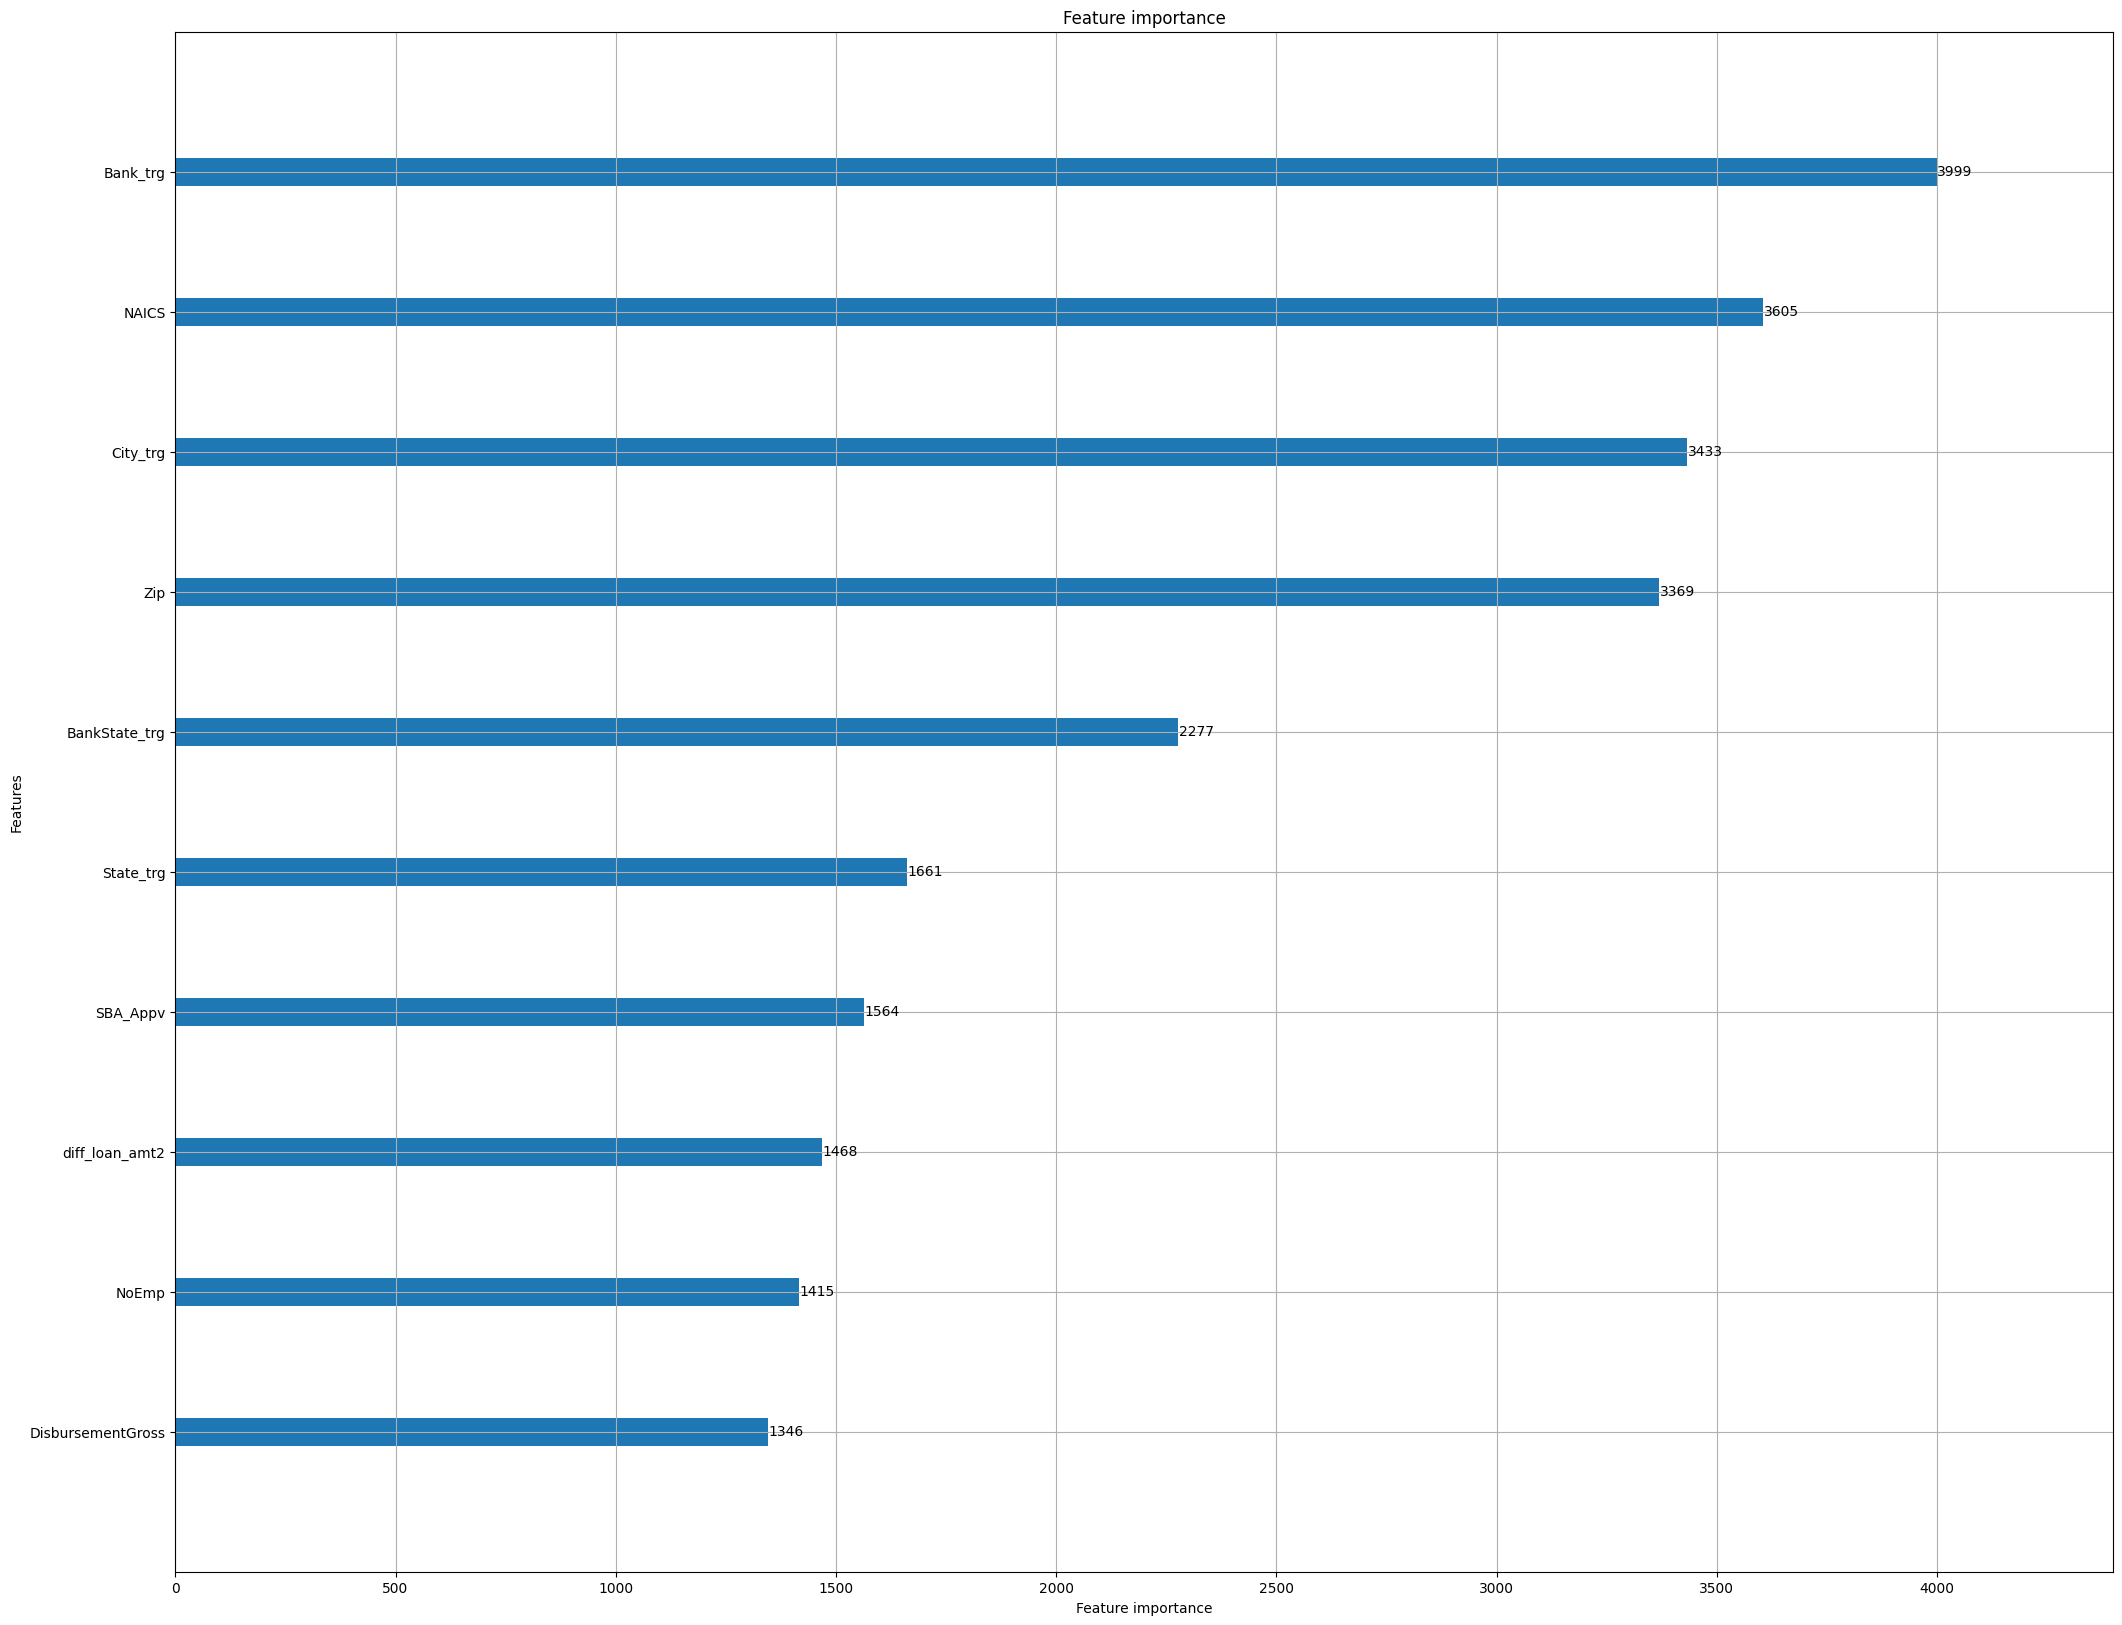

In [693]:
#Feature Importance
lgb.plot_importance(best_lgb,figsize=(25,20),max_num_features=10)

Bank_trg,NAICS and city are the most important features 

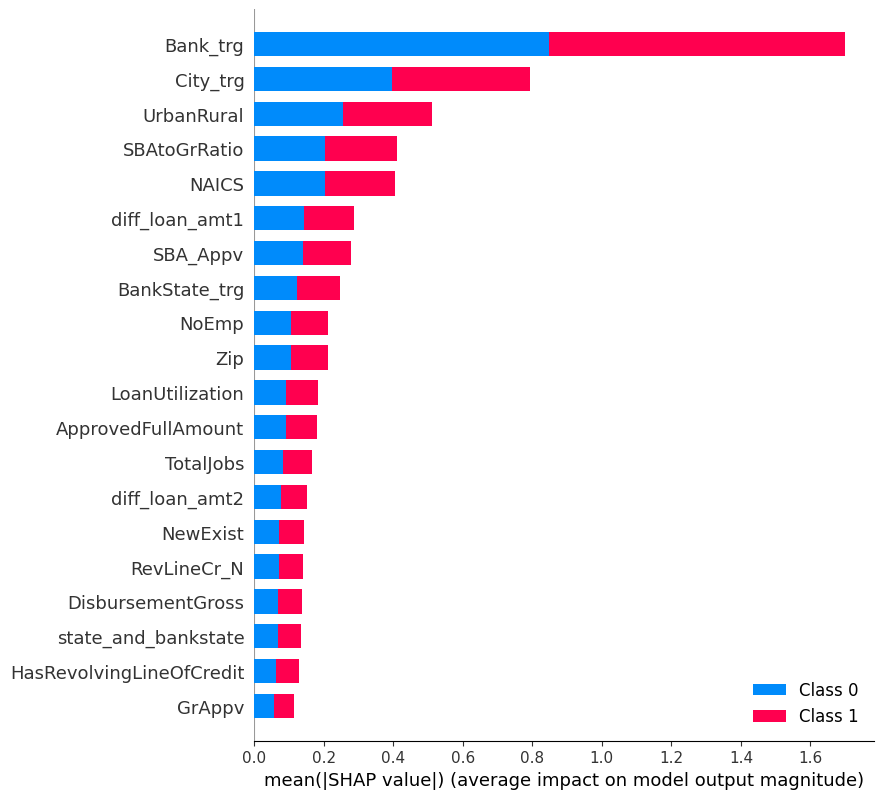

In [695]:
#Shapley values
shap_values = shap.TreeExplainer(best_lgb).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

SHAP provides magnitude and direction of the features
We can see that Bank_trg, City and UrbanRural features have the most impact on prediction and 
the HasRevolvingLineofCredit, GrAppv feature has the lowest impact.
The impact of features on each class are almost equal.

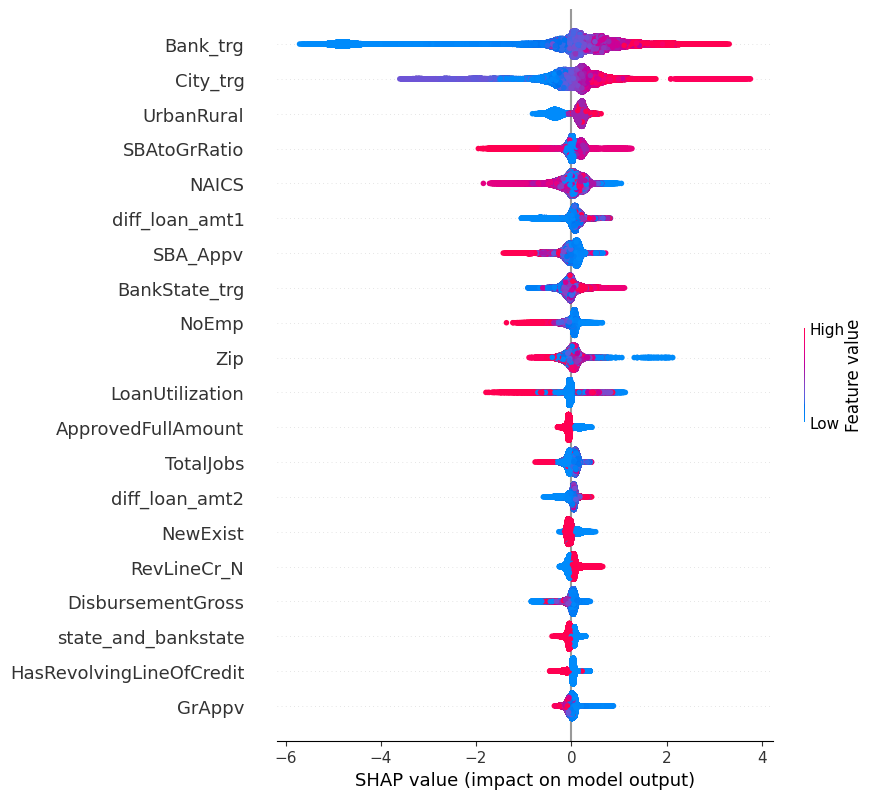

In [697]:
len(shap_values) == 2
shap.summary_plot(shap_values[1], X_test)

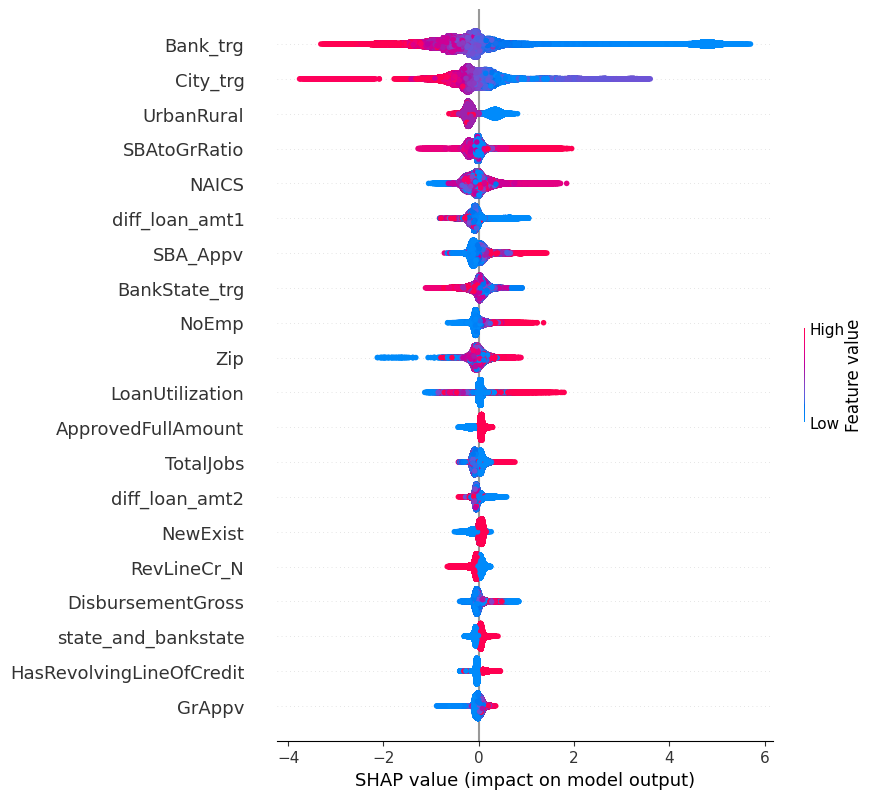

In [698]:
len(shap_values) == 2
shap.summary_plot(shap_values[0], X_test)

# GBM

In [715]:
#Initialize H2O
import shap

import h2o
h2o.init(max_mem_size = "4G")           
h2o.remove_all() 

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,14 hours 49 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,4 months and 2 days !!!
H2O_cluster_name:,H2O_from_python_rohit_y76zgz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.256 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [716]:
#H2O Train and Test Dataset preparation
X_train_h2o = pd.concat([X_train, y_train], axis=1)
X_test_h2o = pd.concat([X_test, y_test], axis=1)
h2o_train = h2o.H2OFrame(X_train_h2o)
h2o_test = h2o.H2OFrame(X_test_h2o)
h2o_train['MIS_Status'] = h2o_train['MIS_Status'].asfactor()
h2o_test['MIS_Status'] = h2o_test['MIS_Status'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [717]:
#Export the files
h2o.export_file(h2o_train, path = "./h2o_train.csv", force = True)
h2o.export_file(h2o_test, path = "./h2o_test.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [718]:
#Train H2O GBM
from h2o.estimators.gbm import H2OGradientBoostingEstimator
predictors_gbm = h2o_train.columns
predictors_gbm.remove('MIS_Status')
response="MIS_Status"
from h2o.estimators import H2OGradientBoostingEstimator

gbm_model = H2OGradientBoostingEstimator()

gbm_model.train(x=predictors_gbm, y=response, training_frame=h2o_train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1683486375118_10338


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22874                  5            5            5             27            32            31.74

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11009867637923607
RMSE: 0.3318112059277626
LogLoss: 0.35694638980793475
Mean Per-Class Error: 0.2755947575058639
AUC: 0.8216873845294635
AUCPR: 0.5489662662477424
Gini: 0.6433747690589271

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26121237428417077
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      397175  62595   0.1361   (62595.0/459770.0)
1      40767   57456   0.415    (40767.0/98223.0)
Total  437942  120051  0.1852   (103362.0/557993.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.261212     0.526458  210
max f2                       0.132126     0.63073   291
max f0point5                 0.41998      0.550907  141
max accuracy                 0.478167     0.851968  119
max precision                0.953534     1         0
max recall                   0.00899745   1         398
max specificity              0.953534     1         0
max absolute_mcc             0.314566     0.419044  185
max min_per_class_accuracy   0.172998     0.739216  261
max mean_per_class_accuracy  0.185902     0.74002   252
max tns                      0.953534     459770    0
max fns                      0.953534     98213     0
max fps                      0.00718737   459770    399
max tps                      0.00899745   98223     398
max tnr                      0.953534     1         0
max fnr                      0.953534     0.999898  0
max fpr                      0.00718737   1         399
max tpr                      0.00899745   1         398

Gains/Lift Table: Avg response rate: 17.60 %, avg score: 17.61 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100109                   0.752815           5.08391    5.08391            0.894916         0.799242   0.894916                    0.799242            0.0508944       0.0508944                  408.391   408.391            0.0496177
2        0.0200003                   0.692053           4.49762    4.79108            0.791712         0.722802   0.843369                    0.761063            0.0449284       0.0958228                  349.762   379.108            0.0920209
3        0.0300004                   0.631267           4.14562    4.57592            0.729749         0.660334   0.805496                    0.727487            0.0414567       0.137279                   314.562   357.592            0.130198
4        0.0400005                   0.58338            3.90942    4.4093             0.688172         0.605026   0.776165                    0.696872            0.0390947       0.176374                   290.942   340.93             0.165508
5        0.0500024                   0.551177           3.6115     4.24972            0.635728     

In [719]:
#Report the Train and Test AUC
perf_train = gbm_model.model_performance(h2o_train)
perf_test = gbm_model.model_performance(h2o_test)
print("GBM Train AUC:",perf_train.auc())
print("GBM Test AUC:",perf_test.auc())

GBM Train AUC: 0.8216887831569167
GBM Test AUC: 0.7913590402351058


In [721]:
#Hyperparameter Tuning
from h2o.grid.grid_search import H2OGridSearch
# GBM hyperparameters
gbm_params = {'learn_rate': [i * 0.02 for i in range(1, 10)],
                'max_depth': list(range(2, 10)),
                'sample_rate': [i * 0.2 for i in range(5, 10)],
                'col_sample_rate': [i * 0.2 for i in range(1, 10)]}

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 30, 'seed': 42}

# Train and validate a grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid',
                          hyper_params=gbm_params,
                          search_criteria=search_criteria)
gbm_grid.train (x=predictors_gbm, 
                y=response,
                training_frame=h2o_train,
                ntrees=100,
                seed=42)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Errors/Warnings building gridsearch model

Hyper-parameter: col_sample_rate, 1.8
Hyper-parameter: learn_rate, 0.08
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 1.8
failure_details: Illegal argument(s) for GBM model: gbm_grid_model_37.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 1.8.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: gbm_grid_model_37.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 1.8.

	at water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:19)
	at hex.tree.gbm.GBM.init(GBM.java:100)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:234)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:252)
	at water.H2O$H2OCountedCompleter.compute

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.9,0.09,9.0,0.6000000,gbm_grid_model_3,0.3191401
,0.5,0.1,9.0,1.0,gbm_grid_model_7,0.3213296
,0.8,0.06,9.0,0.6000000,gbm_grid_model_30,0.3258635
,0.9,0.09,8.0,0.9,gbm_grid_model_36,0.3264948
,0.9,0.03,10.0,0.5,gbm_grid_model_21,0.3320270
,0.8,0.03,9.0,0.9,gbm_grid_model_8,0.3389522
,0.5,0.05,7.0,0.9,gbm_grid_model_2,0.3448125
,0.4,0.08,6.0,0.9,gbm_grid_model_28,0.3461670
,0.3000000,0.03,8.0,1.0,gbm_grid_model_5,0.3505583
,0.4,0.16,4.0,1.0,gbm_grid_model_49,0.3507966


In [722]:
# Report the the Grid validation AUC
gbm_gridperf = gbm_grid.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,auc
,0.9,0.09,9.0,0.6000000,gbm_grid_model_3,0.8658548
,0.5,0.1,9.0,1.0,gbm_grid_model_7,0.8637626
,0.8,0.06,9.0,0.6000000,gbm_grid_model_30,0.8593467
,0.9,0.09,8.0,0.9,gbm_grid_model_36,0.8574023
,0.9,0.03,10.0,0.5,gbm_grid_model_21,0.8562109
,0.8,0.03,9.0,0.9,gbm_grid_model_8,0.8474346
,0.5,0.01,10.0,1.0,gbm_grid_model_24,0.8390826
,0.2,0.02,10.0,0.5,gbm_grid_model_25,0.8388571
,0.5,0.05,7.0,0.9,gbm_grid_model_2,0.8371814
,0.4,0.08,6.0,0.9,gbm_grid_model_28,0.8347801


In [723]:
# Grab the top GBM model, chosen by validation AUC
best_gbm = gbm_gridperf.models[0]
best_gbm

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_grid_model_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         380101                 0            9            8.28          1             456           298.1

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09788790072121532
RMSE: 0.3128704216144686
LogLoss: 0.3191400731323434
Mean Per-Class Error: 0.2396930010769261
AUC: 0.8658548404783248
AUCPR: 0.638708046580607
Gini: 0.7317096809566497

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2840709945865478
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      409845  49925   0.1086   (49925.0/459770.0)
1      36421   61802   0.3708   (36421.0/98223.0)
Total  446266  111727  0.1547   (86346.0/557993.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.284071     0.588731  213
max f2                       0.145234     0.676788  286
max f0point5                 0.443555     0.619757  150
max accuracy                 0.443555     0.866679  150
max precision                0.991738     1         0
max recall                   0.0108919    1         392
max specificity              0.991738     1         0
max absolute_mcc             0.306819     0.497035  203
max min_per_class_accuracy   0.176648     0.779846  267
max mean_per_class_accuracy  0.172838     0.779988  269
max tns                      0.991738     459770    0
max fns                      0.991738     98199     0
max fps                      0.0015233    459770    399
max tps                      0.0108919    98223     392
max tnr                      0.991738     1         0
max fnr                      0.991738     0.999756  0
max fpr                      0.0015233    1         399
max tpr                      0.0108919    1         392

Gains/Lift Table: Avg response rate: 17.60 %, avg score: 17.62 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100001                   0.848044           5.51595    5.51595            0.970968         0.898324    0.970968                    0.898324            0.0551602       0.0551602                  451.595   451.595            0.0548078
2        0.0200003                   0.788618           5.10668    5.31132            0.898925         0.816991    0.934946                    0.857658            0.0510675       0.106228                   410.668   431.132            0.104649
3        0.0300004                   0.734401           4.71472    5.11245            0.829928         0.761726    0.89994                     0.82568             0.0471478       0.153375                   371.472   411.245            0.149732
4        0.0400005                   0.680994           4.35229    4.92241            0.766129         0.707186    0.866487                    0.796057            0.0435234       0.196899                   335.229   392.241            0.190417
5        0.0500006                   0.63283            4.05806    4.74954            0.714337         0.656277    0.83

In [724]:
# Report Model performance on Test Set
best_gbm_perf = best_gbm.model_performance(h2o_test)
best_gbm_perf.auc()

0.8164912030942237

In [725]:
best_gbm_perf.F1()

[[0.2684632433710688, 0.5253511994813053]]

In [726]:
#Reprot the Accuracy, F1, AUC, AUCPR & Confusion Matrix
print("Best accuracy threshold:",best_gbm.model_performance(h2o_test).accuracy()[0][0],"\n",
      " Accuracy:",
      best_gbm.model_performance(h2o_test).accuracy()[0][1])
print("Best F1 threshold:",best_gbm.model_performance(h2o_test).F1()[0][0],"\n",
      " F1:",
      best_gbm.model_performance(h2o_test).F1()[0][1])
print("Model AUC:", best_gbm.model_performance(h2o_test).auc())
print("Model AUCPR:", best_gbm.model_performance(h2o_test).aucpr())
best_gbm.model_performance(h2o_test).confusion_matrix()

Best accuracy threshold: 0.5239167570016608 
  Accuracy: 0.8509701430124613
Best F1 threshold: 0.2684632433710688 
  F1: 0.5253511994813053
Model AUC: 0.8164912030942237
Model AUCPR: 0.530800661429887


,0,1,Error,Rate
0,170908.0,26207.0,0.133,(26207.0/197115.0)
1,17717.0,24308.0,0.4216,(17717.0/42025.0)
Total,188625.0,50515.0,0.1837,(43924.0/239140.0)


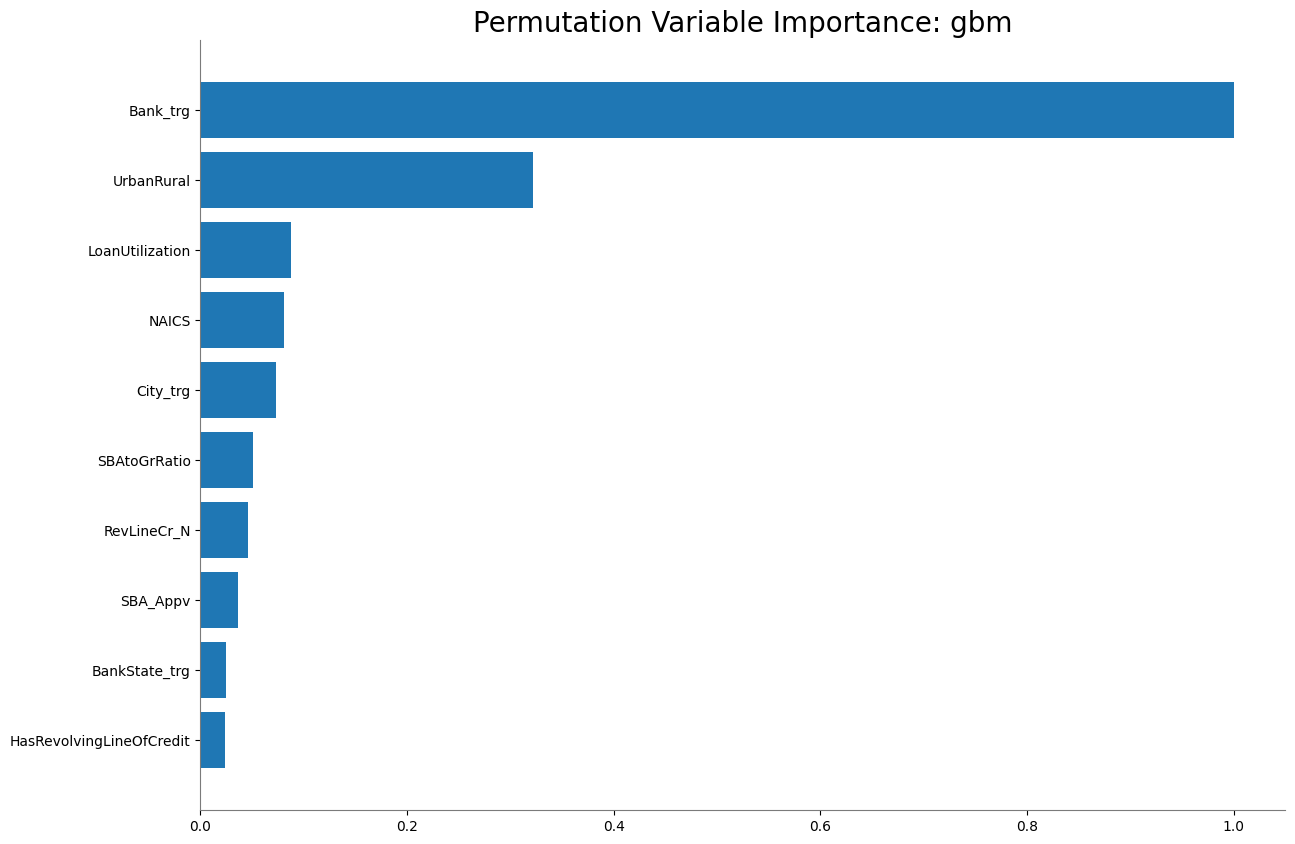

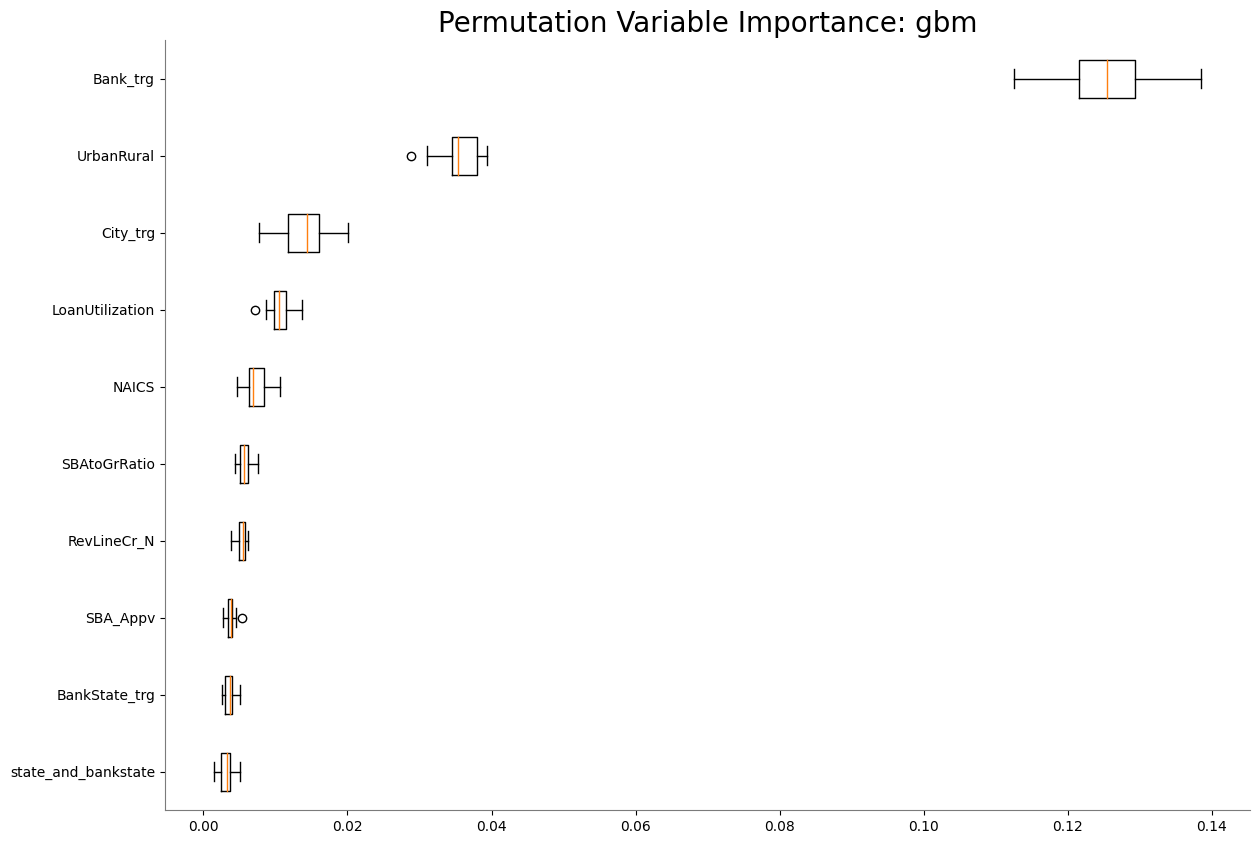

Variable,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,Run 11,Run 12,Run 13,Run 14,Run 15
Bank_trg,0.1304400,0.1221698,0.1353088,0.1213184,0.1255174,0.1272388,0.1227495,0.1303419,0.1217611,0.1126093,0.1282476,0.1187345,0.1384391,0.1275554,0.1129550
UrbanRural,0.0364264,0.0334379,0.0391048,0.0373575,0.0386937,0.0393278,0.0310125,0.0375059,0.0287864,0.0345297,0.0384517,0.0353616,0.0348705,0.0344799,0.0348406
City_trg,0.0173335,0.0175553,0.0137938,0.0143398,0.0117689,0.0094542,0.0147730,0.0145597,0.0165049,0.0102128,0.0154992,0.0201305,0.0117129,0.0076615,0.0134650
LoanUtilization,0.0094533,0.0091077,0.0104086,0.0126293,0.0113935,0.0114826,0.0106097,0.0105585,0.0101273,0.0071792,0.0120030,0.0110221,0.0136437,0.0086623,0.0100701
NAICS,0.0061539,0.0079593,0.0084498,0.0060273,0.0084281,0.0046074,0.0106095,0.0069347,0.0065146,0.0079959,0.0069470,0.0068368,0.0094350,0.0061588,0.0085118
SBAtoGrRatio,0.0056911,0.0059964,0.0075721,0.0053155,0.0051387,0.0045841,0.0071422,0.0050362,0.0049652,0.0063179,0.0059075,0.0059887,0.0070272,0.0053158,0.0044425
RevLineCr_N,0.0048388,0.0056166,0.0040000,0.0053244,0.0054408,0.0059725,0.0048862,0.0049511,0.0054002,0.0056683,0.0054988,0.0061781,0.0062244,0.0060264,0.0038583
SBA_Appv,0.0040475,0.0039715,0.0045140,0.0053369,0.0041541,0.0038497,0.0035797,0.0038950,0.0028572,0.0027320,0.0038013,0.0033881,0.0036478,0.0034953,0.0030612
ApprovedFullAmount,0.0037964,0.0010538,0.0028104,0.0031424,0.0038121,0.0025564,0.0023491,0.0026916,0.0036001,0.0020275,0.0030059,0.0030368,0.0032180,0.0022044,0.0028643
BankState_trg,0.0037676,0.0026276,0.0039649,0.0028862,0.0036194,0.0048973,0.0037607,0.0030344,0.0036422,0.0039789,0.0030431,0.0050519,0.0032522,0.0046346,0.0029794


In [727]:
#Permutation Feature Importance
permutation_varimp = best_gbm.permutation_importance(h2o_test, use_pandas=True)

#Barplot of feature importance
gbm_model.permutation_importance_plot(h2o_test)

#Boxplot of feature importance
gbm_model.permutation_importance_plot(h2o_test, n_repeats=15)

The most important feature is Bank and Urban Rural.
Feature importance doesnt portray the direction for that we need to look at the shapley values

In [728]:
def examine_all_reason_codes(data, model):

    shap_contribs = model.predict_contributions(data)

    col_mapping = {}
    for i in data.col_names:
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols

    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)

    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)

    return shap.summary_plot(shap_contribs[shap_cols].values,
                             X[shap_cols].values,
                             feature_names=shap_cols
                             )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


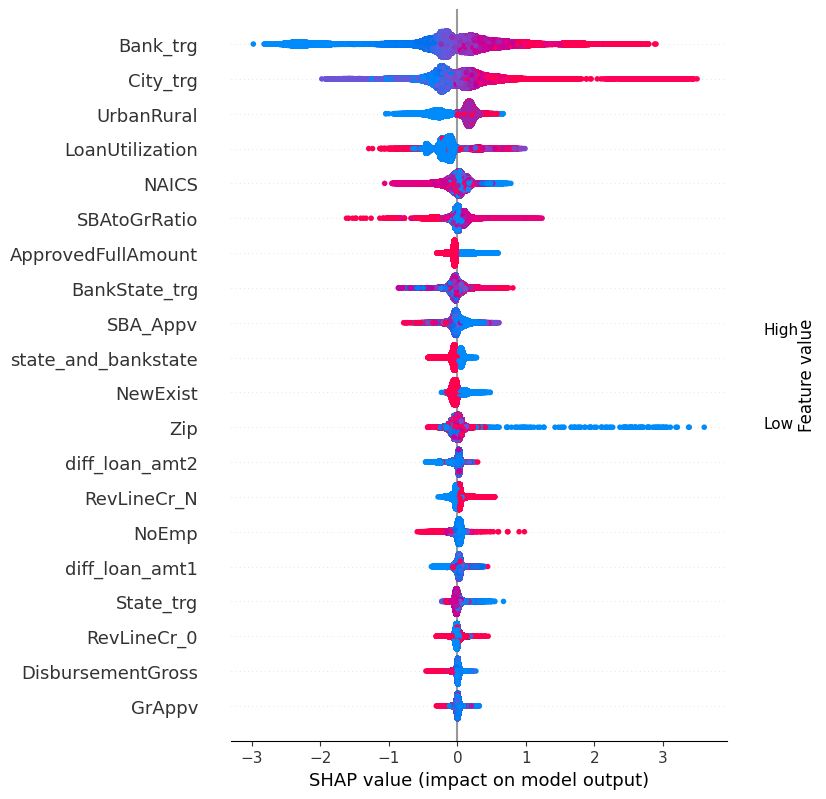

In [729]:
examine_all_reason_codes(h2o_test,best_gbm)

The shapley values for the whole dataset tell us that Bank is the most important variable followed by City and Loan Utilization. They impact positively in the overall model. 

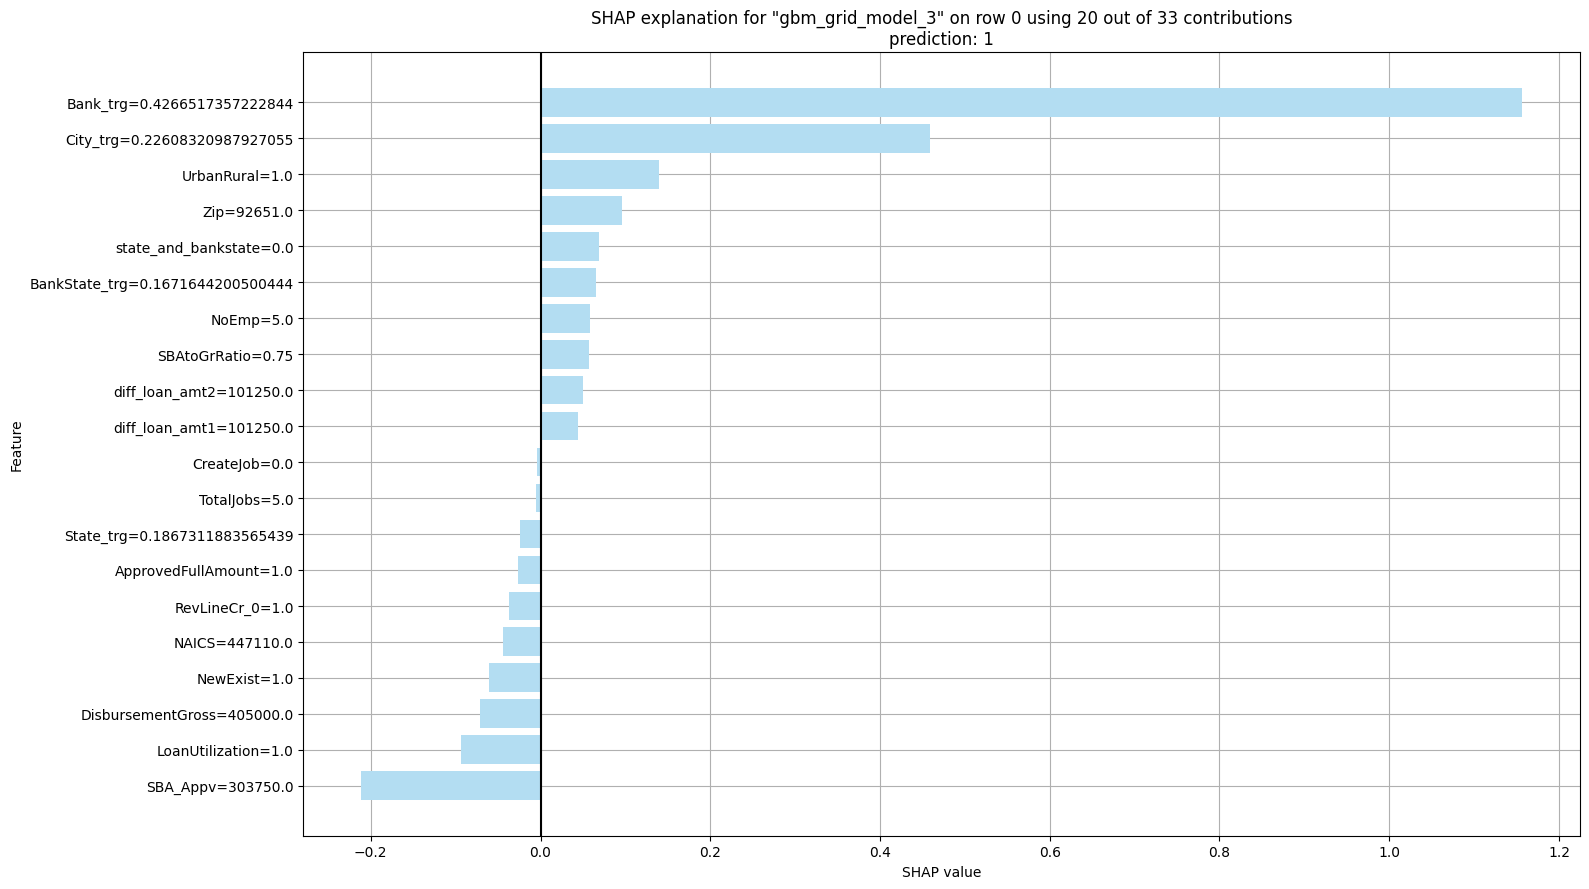

In [730]:
#Individual analysis using Shapley values
# Using H2O-3 plotting
best_gbm.shap_explain_row_plot(h2o_test, row_index=0)


LoanUtilization and SBA_Appv are negatively impacting our Prediction whereas Bank and City are positively impacting our prediction

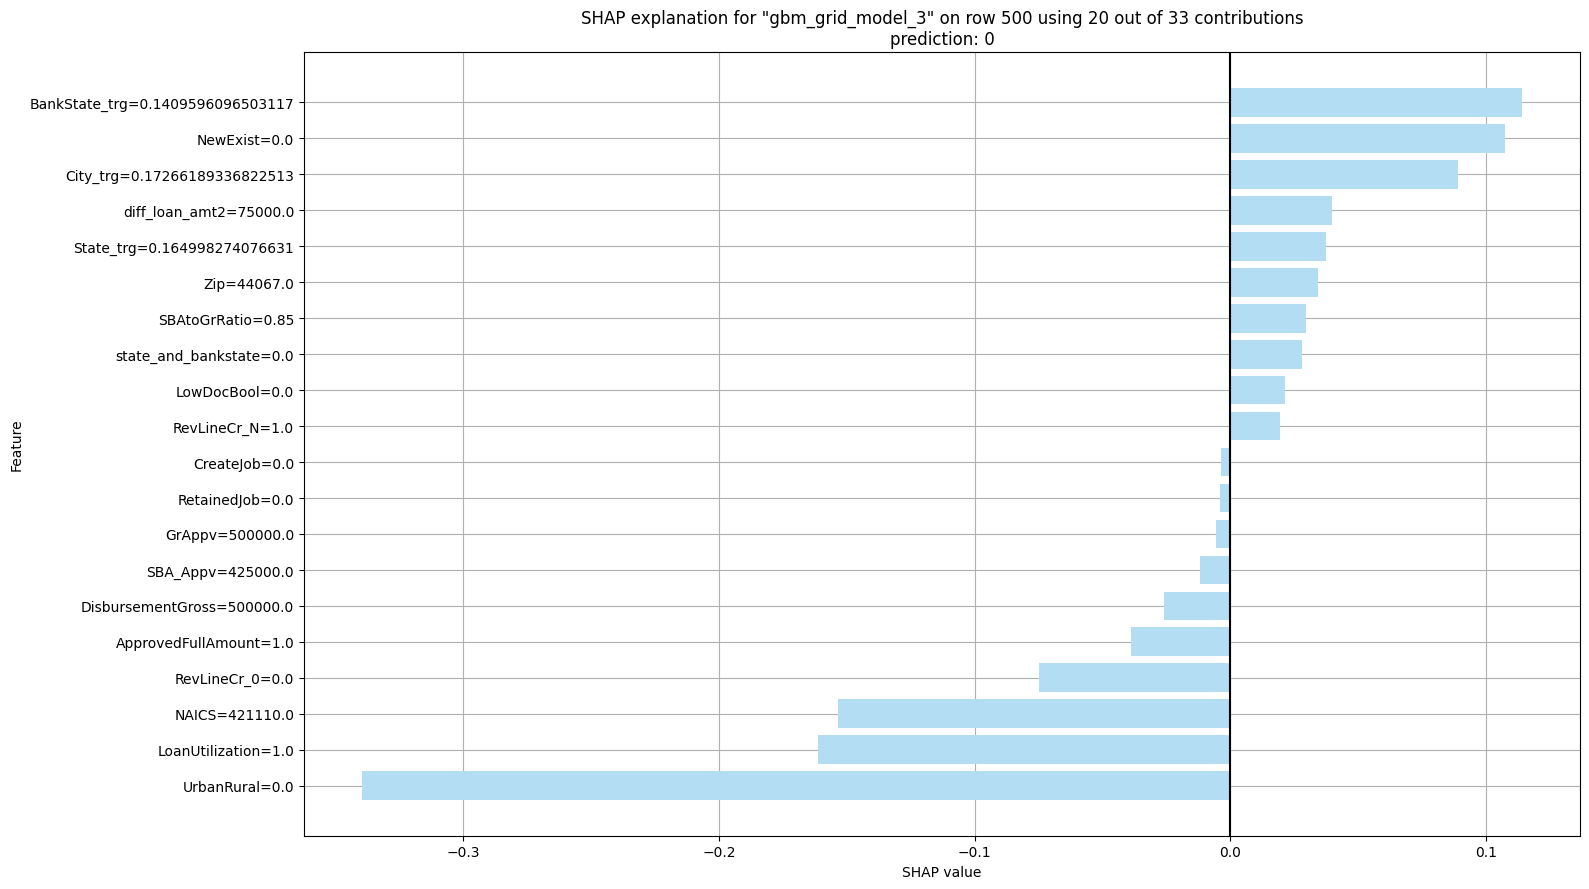

In [731]:
best_gbm.shap_explain_row_plot(h2o_test, row_index=500)

LoanUtilization and UrbanRural are negatively impacting our Prediction here whereas NewExist and BankState are positively impacting our Prediction here.

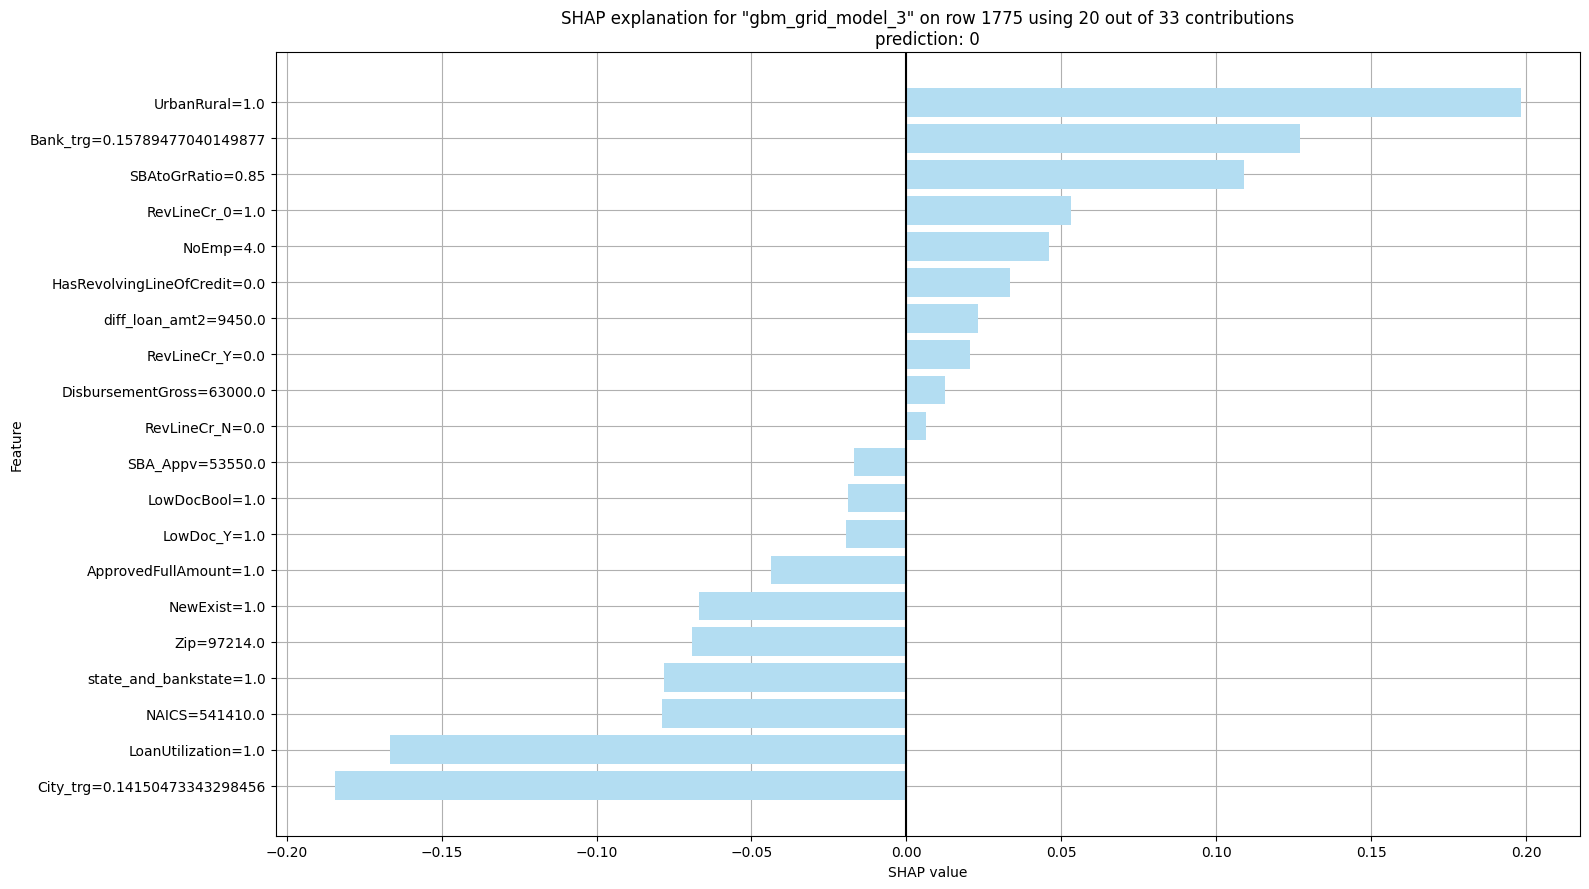

In [732]:
best_gbm.shap_explain_row_plot(h2o_test, row_index=1775)


UrbanRural and Bank are positively impacting our Prediction for this record.

In [699]:
X_train

,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,...,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_0,RevLineCr_N,RevLineCr_T,RevLineCr_Y,LowDoc_N,LowDoc_Y
261239,30125,0,22,0,0,0,1,0,275000.0,0.0,...,0.135283,0.239594,0.141928,0.179658,0.0,1.0,0.0,0.0,1.0,0.0
446692,49881,484110,2,1,0,2,0,2,180000.0,0.0,...,0.153126,0.223243,0.141928,0.218302,1.0,0.0,0.0,0.0,1.0,0.0
115654,19512,0,5,0,0,0,0,0,40000.0,0.0,...,0.157399,0.147366,0.141928,0.179658,0.0,1.0,0.0,0.0,0.0,1.0
407073,54155,0,13,1,0,0,0,0,175000.0,0.0,...,0.090004,0.120547,0.110035,0.114116,1.0,0.0,0.0,0.0,1.0,0.0
96986,59218,454312,11,1,0,11,0,2,50000.0,0.0,...,0.132068,0.065823,0.415759,0.388499,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179827,41042,722110,15,1,0,15,0,1,35000.0,0.0,...,0.171598,0.188055,0.177513,0.159227,0.0,1.0,0.0,0.0,1.0,0.0
779789,98531,811310,6,1,0,0,0,2,154000.0,0.0,...,0.176470,0.142282,0.277679,0.296149,0.0,1.0,0.0,0.0,1.0,0.0
203169,96819,421830,1,1,0,0,0,0,20000.0,0.0,...,0.150549,0.155271,0.177778,0.101165,0.0,1.0,0.0,0.0,0.0,1.0
622532,85382,622110,2,0,5,2,0,1,145000.0,0.0,...,0.230769,0.205337,0.072468,0.223726,1.0,0.0,0.0,0.0,1.0,0.0


In [700]:
columns_to_score = X_train

#  saving artifacts

In [703]:
# artifacts saving
artifacts_dict = {
    "col_remove_dollar": columns,
    "cat_encoders": cat_encoders,
    "model": best_lgb,
    "threshold": best_threshold,
    "best_parameter": best_params,
    "threshold": threshold,
    "columns_to_score": columns_to_score
}



In [704]:
import pickle
artifacts_dict_file = open("artifacts_dictnew_file.pkl", "wb")
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
artifacts_dict_file.close()
